# Workshop 9: Advection with FVM

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 90px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 25px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.1, Wednesday October 15, 2023.*

## Overview:

In this workshop will use Python to solve the [advection problem covered in the textbook](https://mude.citg.tudelft.nl/book/fvm/advection.html) in 1D and 2D. There are two main objectives:
1. Understand the advection problem itself (how the quantity of interest is transported by the velocity field)
2. Explore characteristics of the numerical analysis schemes employed, in particular: numerical diffusion and FVM stability

To do this we will do the following:
- Implement the central difference and backward difference spatial averaging schemes for FVM
- Apply a boundary condition such that the quantity of interest repeatedly travels through the plot window (this helps us visualize the process!)
- Evaluate stability of central and backward difference schemes
- Use the Courant number, $C_N$, to understand numerical stability

Programming requirements: you will need to fill in a few missing pieces of the functions, but mostly you will change the values of a few Python variables to evaluate different aspects of the problem.


The following Python variables will be defined to set up the problem:
```
p0 = initial value of our "pulse" (the quantity of interest, \phi) [-]
c = speed of the velocity field [m/s]
L = length of the domain [m]
Nx = number of volumes in the direction x
T = duration of the simulation (maximum time) [s]
Nt = number of time steps
```

There are also two flag variables: 1) `central` will allow you to switch between central and backward spatial discretization schemes, and 2) `square` changes the pulse from a square to a smooth bell curve (default for both is `True`; don't worry about it until intstructed to change it).

For the 2D case, `c`, `L`, `Nx` are extended as follows:
```
c --> cx, cy
L --> Lx, Ly
Nx -> Nx, Ny
```

## Task 1: Implement Central Difference

We are going to implement the central difference scheme as derived in the textbook; however, instead of implementing the system of equations in a matrix formulation, we will _loop over each of the finite volumes in the system,_ one at a time.

Because we will want to watch the "pulse" travel over a long period of time, we will take advantage of the reverse-indexing of Python (i.e., the fact that an index `a[-3]`, for example, will access the third item from the end of the array or list). When taking the volumes to the left of the first volume in direction $x$, we can use the values of $\phi$ from the "last" volumes in $x$ (the end of the array). All we need to do is shift the index for $\phi_i$ such that we avoid a situation where `i+1` "breaks" the loop (because the maximum index is `i`). In other words, only volumes with index `i` or smaller should be used (e.g., instead of `i-1`, `i`,  and `i+1`, use `i-2`, `i-1` and `i`.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>

<b>Read.</b> Read the code to understand the problem that has been set up for you. Check the arguments and return values; the docstrings are purposefully ommitted so you can focus on the code. You might as well re-read the instructions above one more time, as well (let's be honest, you probably just skimmed over it anyway...)
    
</div>


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>

Implement the central difference scheme in the function <code>advection_1D</code>. Make sure you use the right indexing (maximum index should be <code>i</code>).
    
</div>

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from ipywidgets import interact, fixed, widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Complete the functions to solve the 1D problem. A plotting function has already been defined, which will be used to check your initial conditions and visualize time steps in the solution.

In [2]:
def initialize_1D(p0, L, Nx, T, Nt, square=True):
    ''' Initilize the grid. 
    '''
    
    dx = L/Nx
    dt = T/Nt
    
    x = np.linspace(dx/2, L - dx/2, Nx)

    # Initialise the domain with values 1 everywhere but 2 between 0.5 and 1
    if square:
        p_init = np.zeros(Nx)
        p_init[int(.5/dx):int(1/dx + 1)] = p0  #setting u = 2 between 0.5 and 1 as per our I.C.s
    else:
        p_init = np.exp(-((x-1.0)/0.5**2)**2)

    # Definte output matrix
    p_all = np.zeros((Nt+1, Nx)) #array of output solutions
    p_all[0] = p_init
    return x, p_all

def advection_1D(p, dx, dt, c, Nx, central=True):

    p_new = np.zeros(Nx)
    # Loops over the volumes. 
    for i in range(0, Nx):
        if central:
            p_new[i-1] = p[i-1] - c * dt * p[i] / (2 * dx) + c * dt * p[i-2] / (2 * dx) 
        else:
            p_new[i-1] = p[i-1] - c * dt * p[i-1]/ (2 * dx)  + c * dt * p[i-2] / (2 * dx)    
    return p_new
    
def run_simulation_1D(p0, c, L, Nx, T, Nt, dx, dt, central=True, square=True):
    ''' Runs the simulation.
    '''
    
    x, p_all = initialize_1D(p0, L, Nx, T, Nt, square=square)
    
    for t in range(Nt):
        p = advection_1D(p_all[t], dx, dt, c, Nx, central=central)
        p_all[t + 1] = p
        
    return x, p_all
    
def plot_1D(x, p, step=0):
    fig = plt.figure()
    ax = plt.axes(xlim=(0, round(x.max())), ylim=(0, int(np.ceil(p[0].max())) + 1)) # define these limits are per you conditions   
    ax.plot(x, p[step], marker='.')
    plt.xlabel('$x$ [m]')
    plt.ylabel('Amplitude, $\phi$ [$-$]')
    plt.title('Advection in 1D')
    plt.show()
    
def plot_1D_all():
    check_variables_1D()
    
    play = widgets.Play(min=0, max=Nt-1, step=1, value=0,
                        interval=100, disabled=False)
    slider = widgets.IntSlider(min=0, max=Nt-1, step=1, value=0)
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    interact(plot_1D, x=fixed(x), p=fixed(p_all), step=play)

    return widgets.HBox([slider])
    
def check_variables_1D():
    print('Current variables values:')
    print(f'  p0 [---]: {p0:0.2f}')
    print(f'  c  [m/s]: {c:0.2f}')
    print(f'  L  [ m ]: {L:0.1f}')
    print(f'  Nx [---]: {Nx:0.1f}')
    print(f'  T  [ s ]: {T:0.1f}')
    print(f'  Nt [---]: {Nt:0.1f}')
    print(f'  dx [ m ]: {dx:0.2e}')
    print(f'  dt [ s ]: {dt:0.2e}')
    print(f'Using central difference?: {central}')
    print(f'Matrix of unknowns, shape: ({Nt+1}, {Nx})')
    print(f'The Courant number C_N is: {c*dt/dx:.2e}')

Variables are set below, then you should use the functions provided, for example, `check_variables_1D`, prior to running a simulation to make sure you are solving the problem you think you are!

In [8]:
p0 = 2.0
c = 5.0

L = 2.0
Nx = 100
T = 40
Nt =  10000

dx = L/Nx
dt = T/Nt

central = False
square = True

_You can ignore any warning that result from running the code below._

In [9]:
check_variables_1D()
x, p_all = run_simulation_1D(p0, c, L, Nx, T, Nt, dx, dt, central, square=True)

Current variables values:
  p0 [---]: 2.00
  c  [m/s]: 5.00
  L  [ m ]: 2.0
  Nx [---]: 100.0
  T  [ s ]: 40.0
  Nt [---]: 10000.0
  dx [ m ]: 2.00e-02
  dt [ s ]: 4.00e-03
Using central difference?: False
Matrix of unknowns, shape: (10001, 100)
The Courant number C_N is: 1.00e+00


Use the plotting function to check your initial values. It should look like a "box" shape somwhere in the $x$ domain with velocity $c$ m/s.

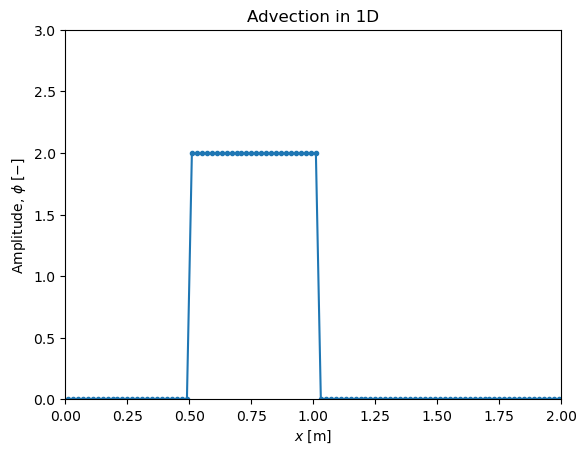

In [10]:
plot_1D(x, p_all)

Visualize. You should see the wave moving from the left to right and then coming back in through the left (in the plot). _Click play repeatedly for the simulation to work._

In [11]:
plot_1D_all()

Current variables values:
  p0 [---]: 2.00
  c  [m/s]: 5.00
  L  [ m ]: 2.0
  Nx [---]: 100.0
  T  [ s ]: 40.0
  Nt [---]: 10000.0
  dx [ m ]: 2.00e-02
  dt [ s ]: 4.00e-03
Using central difference?: False
Matrix of unknowns, shape: (10001, 100)
The Courant number C_N is: 1.00e+00


interactive(children=(Play(value=0, description='step', max=9999), Output()), _dom_classes=('widget-interact',…

## Task 2: Central Difference Doesn't Work!

The method doesn't work because of the way central differences "deals" with averaging values to the left and right of the pulse. We can explore this further by replacing the square pulse with a smooth one. You can do this by changing the value of `square` from `True` to `False`.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>
Run the 1D simulation again using a smooth pulse. Does the simulation work?
</div>

In [12]:
# re-define key variables and use run_simulation_1D() and plot_1D_all()

p0 = 2.0
c = 5.0

L = 2.0
Nx = 100
T = 40
Nt =  10000

dx = L/Nx
dt = T/Nt

central = True
square = True

check_variables_1D()
x, p_all = run_simulation_1D(p0, c, L, Nx, T, Nt, dx, dt, central, square=False)




Current variables values:
  p0 [---]: 2.00
  c  [m/s]: 5.00
  L  [ m ]: 2.0
  Nx [---]: 100.0
  T  [ s ]: 40.0
  Nt [---]: 10000.0
  dx [ m ]: 2.00e-02
  dt [ s ]: 4.00e-03
Using central difference?: True
Matrix of unknowns, shape: (10001, 100)
The Courant number C_N is: 1.00e+00


C:\Users\gniko\AppData\Local\Temp\ipykernel_17072\3362397217.py:28: RuntimeWarning: overflow encountered in scalar add
  p_new[i-1] = p[i-1] - c * dt * p[i] / (2 * dx) + c * dt * p[i-2] / (2 * dx)
C:\Users\gniko\AppData\Local\Temp\ipykernel_17072\3362397217.py:28: RuntimeWarning: overflow encountered in scalar subtract
  p_new[i-1] = p[i-1] - c * dt * p[i] / (2 * dx) + c * dt * p[i-2] / (2 * dx)
C:\Users\gniko\AppData\Local\Temp\ipykernel_17072\3362397217.py:28: RuntimeWarning: invalid value encountered in scalar subtract
  p_new[i-1] = p[i-1] - c * dt * p[i] / (2 * dx) + c * dt * p[i-2] / (2 * dx)


In [13]:
plot_1D_all()

Current variables values:
  p0 [---]: 2.00
  c  [m/s]: 5.00
  L  [ m ]: 2.0
  Nx [---]: 100.0
  T  [ s ]: 40.0
  Nt [---]: 10000.0
  dx [ m ]: 2.00e-02
  dt [ s ]: 4.00e-03
Using central difference?: True
Matrix of unknowns, shape: (10001, 100)
The Courant number C_N is: 1.00e+00


interactive(children=(Play(value=0, description='step', max=9999), Output()), _dom_classes=('widget-interact',…

## Task 3: Backward Difference

It turns out using a backward difference scheme will fix the numerical issue. We can apply it to the finite volume approach used here as follows: for the East face, take the value as $\phi_i^{n}$, and for the West face, use $\phi_{i-1}^{n}$.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>

Derive the backward difference scheme then implment it in the function <code>advection_1D</code>. Re-run the analysis after setting the <code>central</code> flag to <code>False</code>.
    
</div>

In [14]:
# re-define key variables and use run_simulation_1D() and plot_1D_all()


p0 = 2.0
c = 5.0

L = 2.0
Nx = 100
T = 40
Nt =  10000

dx = L/Nx
dt = T/Nt

central = False
square = True

check_variables_1D()
x, p_all = run_simulation_1D(p0, c, L, Nx, T, Nt, dx, dt, central, square=False)

Current variables values:
  p0 [---]: 2.00
  c  [m/s]: 5.00
  L  [ m ]: 2.0
  Nx [---]: 100.0
  T  [ s ]: 40.0
  Nt [---]: 10000.0
  dx [ m ]: 2.00e-02
  dt [ s ]: 4.00e-03
Using central difference?: False
Matrix of unknowns, shape: (10001, 100)
The Courant number C_N is: 1.00e+00


In [15]:
plot_1D_all()

Current variables values:
  p0 [---]: 2.00
  c  [m/s]: 5.00
  L  [ m ]: 2.0
  Nx [---]: 100.0
  T  [ s ]: 40.0
  Nt [---]: 10000.0
  dx [ m ]: 2.00e-02
  dt [ s ]: 4.00e-03
Using central difference?: False
Matrix of unknowns, shape: (10001, 100)
The Courant number C_N is: 1.00e+00


interactive(children=(Play(value=0, description='step', max=9999), Output()), _dom_classes=('widget-interact',…

## Task 4: Stability Analysis

Now, let’s play with the code. In convective kinematics a simple von Neumann analysis on the advection equation suggests that the following must hold for stability:
$$
C_N = \frac{c \Delta t}{\Delta x} \leq 1
$$
    
$C_N$ is the Courant number, a dimensionless quantity that relates the speed of information leaves a finite volume, relating speed to the ratio of time step duration and cell length. The ratio can provide us an indication of the inherent stability of explicit schemes.  


<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <p>
        The Stability page in the textbook had some mistakes that were fixed Wed morning.
    </p>
</div>


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>

Change the Python variables that define the problem and check to see if the Courant number predicts stability of the method. You are welcome to explore both discretization schemes and pulse types; there is no "right answer" to this question, except confirming that large $C_N$ causes instability, and vice-versa.

</div>

## Task 5: 2D Implementation in Python

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>
The code is set up in a very similar way to the 1D case above. Use it to explore how the advection problem works in 2D! In particular, see if you observe the effect called "numerical diffusion" --- when the numerical scheme causes the square pulse to "diffuse" into a bell shaped surface. Even though only the advection term was implmented!
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <p>
        The initial values of the variables below will result in numerical instability. See if you can fix it!
    </p>
</div>

In [30]:
p0 = 2.0
cx = 5.0
cy = 5.0

Lx = 5.0
Nx = 100
Ly = 5.0
Ny = 100
T = 40
Nt =  5000

dx = Lx/Nx
dy = Ly/Ny
dt = T/Nt

central = False

In [31]:
def initialize_2D(p0, Lx, Nx, Ly, Ny, T, Nt):
    x = np.linspace(dx/2, Lx - dx/2, Nx)
    y = np.linspace(dy/2, Ly - dx/2, Ny)
    X, Y = np.meshgrid(x, y)
    
    # Initialise the domain with values 1 everywhere but 2 between 0.5 and 1 along both the axes
    p_init = np.ones((Nx, Ny))# Initial condition
    p_init[int(0.5/dx):int(1/dx + 1), int(0.5 / dy):int(1/dy + 1)] = 2 #setting u = 2 between 0.5 and 1 as per our I.C.s

    # Definte output matrix
    p_all = np.zeros((Nt + 1, Nx, Ny)) #array of output solutions
    p_all[0] = p_init
    return X, Y, p_all

def advection_2D(p, cx, cy, Nx, Ny, dx, dy, dt, central=True):
    # We need a periodic boundary condition here, which means that whatever goes out from the right comes 
    # back through the left
    # It is done automatically in Python through its cyclc indexing
    p_new = np.ones((Nx,Ny))
    #
    for i in range(0, Nx):
        for j in range(0, Ny):
            # Linear scheme (average of neighboring cells)
            # p_new[i-1,j-1] = p[i-1,j-1] - 0.5*(cx*dt/dx)*(p[i,j-1] - p[i-2,j-1]) - 0.5*(cy*dt/dy)*(p[i-1,j] - p[i-1,j-2])
            # Backward scheme 
            #p_new[i] = p[i] - 1   * (c * dt / dx) * (p[i]     - p[i - 1])   
            p_new[i, j] = p[i, j] - (cx * dt / dx) * (p[i, j] - p[i - 1, j]) - (cy * dt / dy) * (p[i, j] - p[i, j - 1])
    return p_new
    
def run_simulation_2D(p0, cx, cy, Lx, Nx, Ly, Ny, T, Nt, dx, dy, dt, central=True):
    
    X, Y, p_all = initialize_2D(p0, Lx, Nx, Ly, Ny, T, Nt)
    
    for t in range(Nt):
        p = advection_2D(p_all[t], cx, cy, Nx, Ny, dx, dy, dt, central=central)
        p_all[t + 1] = p
        
    return X, Y, p_all

def plot_2D(p, X, Y, step=0):
    'Create 2D plot, X and Y are formatted as meshgrid.'''
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')  # Use Axes3D for 3D plotting
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('$phi$ [-]') 
    ax.set_title('Advection in 2D')
    surf = ax.plot_surface(X, Y, p[step], cmap='Blues', rstride=2, cstride=2)
    fig.colorbar(surf, shrink=0.5, aspect=5)  # Add a color bar
    plt.show()

def plot_2D_all():
    check_variables_2D()
    
    play = widgets.Play(min=0, max=Nt-1, step=1, value=0,
                        interval=100, disabled=False)
    slider = widgets.IntSlider(min=0, max=Nt-1, step=1, value=0)
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    interact(plot_2D,
             p=fixed(p_all),
             X=fixed(X),
             Y=fixed(Y),
             step=play)

    return widgets.HBox([slider])

def check_variables_2D():
    print('Current variables values:')
    print(f'  p0 [---]: {p0:0.2f}')
    print(f'  cx [m/s]: {cx:0.2f}')
    print(f'  cy [m/s]: {cy:0.2f}')
    print(f'  Lx [ m ]: {Lx:0.1f}')
    print(f'  Nx [---]: {Nx:0.1f}')
    print(f'  Ly [ m ]: {Ly:0.1f}')
    print(f'  Ny [---]: {Ny:0.1f}')
    print(f'  T  [ s ]: {T:0.1f}')
    print(f'  Nt [---]: {Nt:0.1f}')
    print(f'  dx [ m ]: {dx:0.2e}')
    print(f'  dy [ m ]: {dy:0.2e}')
    print(f'  dt [ s ]: {dt:0.2e}')
    print(f'Using central difference?: {central}')
    print(f'Solution shape p_all[t_i]: ({Nx}, {Ny})')
    print(f'Total time steps in p_all: {Nt+1}')
    print(f'Courant, C_N, direction x: {cx*dt/dx:.2e}')
    print(f'Courant, C_N, direction y: {cy*dt/dy:.2e}')

In [32]:
check_variables_2D()

Current variables values:
  p0 [---]: 2.00
  cx [m/s]: 5.00
  cy [m/s]: 5.00
  Lx [ m ]: 5.0
  Nx [---]: 100.0
  Ly [ m ]: 5.0
  Ny [---]: 100.0
  T  [ s ]: 40.0
  Nt [---]: 5000.0
  dx [ m ]: 5.00e-02
  dy [ m ]: 5.00e-02
  dt [ s ]: 8.00e-03
Using central difference?: False
Solution shape p_all[t_i]: (100, 100)
Total time steps in p_all: 5001
Courant, C_N, direction x: 8.00e-01
Courant, C_N, direction y: 8.00e-01


In [33]:
check_variables_2D()
X, Y, p_all = run_simulation_2D(p0, cx, cy, Lx, Nx, Ly, Ny, T, Nt, dx, dy, dt, central)

Current variables values:
  p0 [---]: 2.00
  cx [m/s]: 5.00
  cy [m/s]: 5.00
  Lx [ m ]: 5.0
  Nx [---]: 100.0
  Ly [ m ]: 5.0
  Ny [---]: 100.0
  T  [ s ]: 40.0
  Nt [---]: 5000.0
  dx [ m ]: 5.00e-02
  dy [ m ]: 5.00e-02
  dt [ s ]: 8.00e-03
Using central difference?: False
Solution shape p_all[t_i]: (100, 100)
Total time steps in p_all: 5001
Courant, C_N, direction x: 8.00e-01
Courant, C_N, direction y: 8.00e-01


C:\Users\gniko\AppData\Local\Temp\ipykernel_17072\3406762208.py:27: RuntimeWarning: overflow encountered in scalar subtract
  p_new[i, j] = p[i, j] - (cx * dt / dx) * (p[i, j] - p[i - 1, j]) - (cy * dt / dy) * (p[i, j] - p[i, j - 1])
C:\Users\gniko\AppData\Local\Temp\ipykernel_17072\3406762208.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  p_new[i, j] = p[i, j] - (cx * dt / dx) * (p[i, j] - p[i - 1, j]) - (cy * dt / dy) * (p[i, j] - p[i, j - 1])


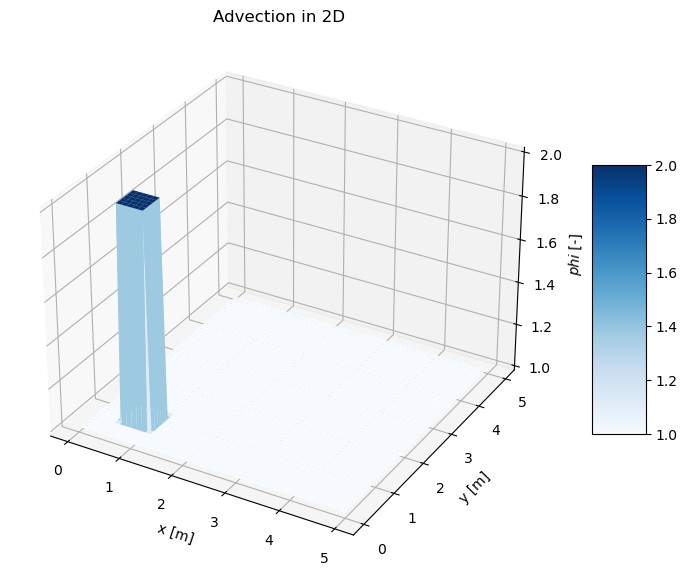

In [34]:
plot_2D(p_all, X, Y)

In [35]:
plot_2D_all()

Current variables values:
  p0 [---]: 2.00
  cx [m/s]: 5.00
  cy [m/s]: 5.00
  Lx [ m ]: 5.0
  Nx [---]: 100.0
  Ly [ m ]: 5.0
  Ny [---]: 100.0
  T  [ s ]: 40.0
  Nt [---]: 5000.0
  dx [ m ]: 5.00e-02
  dy [ m ]: 5.00e-02
  dt [ s ]: 8.00e-03
Using central difference?: False
Solution shape p_all[t_i]: (100, 100)
Total time steps in p_all: 5001
Courant, C_N, direction x: 8.00e-01
Courant, C_N, direction y: 8.00e-01


interactive(children=(Play(value=0, description='step', max=4999), Output()), _dom_classes=('widget-interact',…

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.